## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import joblib

## Step 1: Loading and Inspecting the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("Salary Prediction of Data Professions.csv")

In [3]:
# Inspect the first few rows of the dataset
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [4]:
# Check for missing values
df.isna().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [5]:
# Summary statistics
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [6]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [7]:
# Check the data types
df.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [8]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

## Step 2: Exploratory Data Analysis (EDA)

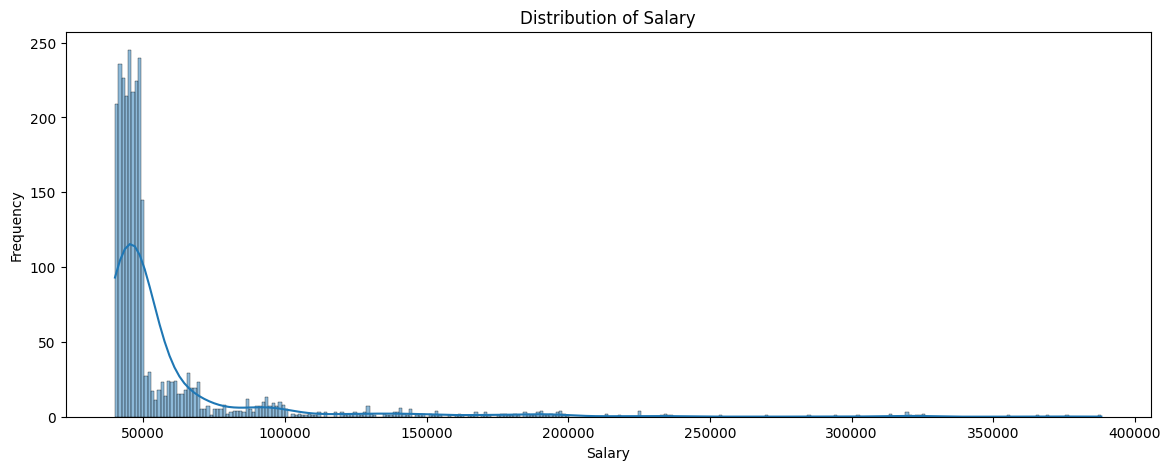

In [9]:
# Distribution of salaries
plt.figure(figsize=(14,5))
sns.histplot(df['SALARY'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

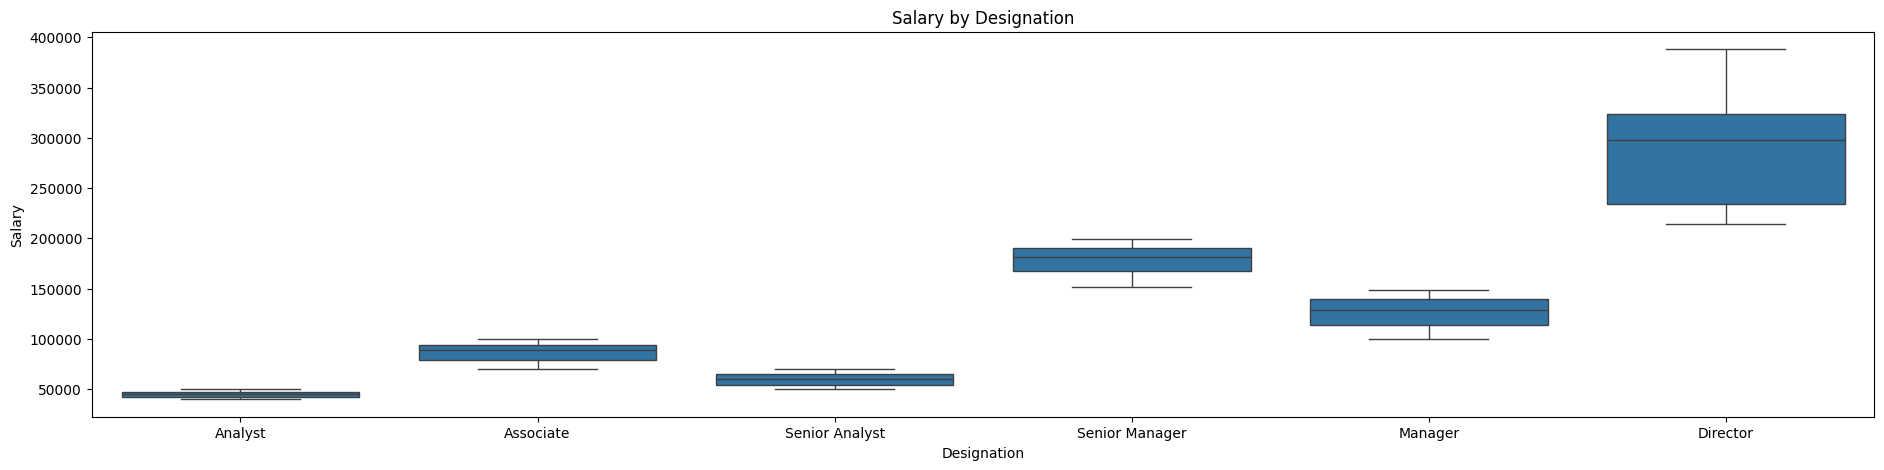

In [10]:
# Boxplot of salaries by designation
plt.figure(figsize=(23,5))
sns.boxplot(x='DESIGNATION', y='SALARY', data=df)
plt.title('Salary by Designation')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()

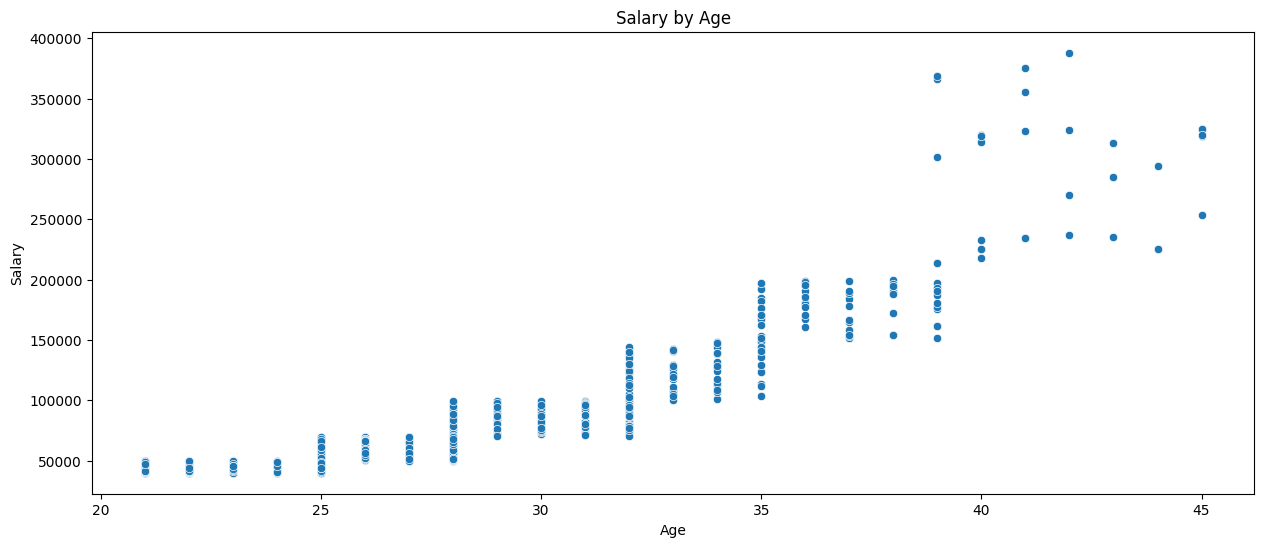

In [11]:
# Scatter plot of salary vs age
plt.figure(figsize=(15,6))
sns.scatterplot(x='AGE', y='SALARY', data=df)
plt.title('Salary by Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

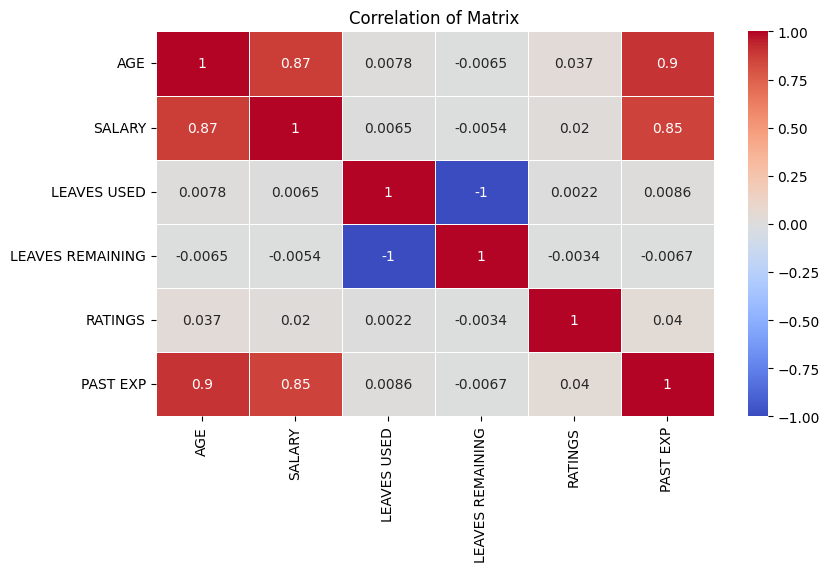

In [12]:
# Correlation matrix
plt.figure(figsize=(9,5))
numeric = df.select_dtypes(include=['int64', 'float64'])
corr_df = numeric.corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Matrix')
plt.show()

## Step 3: Feature Engineering

In [13]:
# Convert date columns to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

In [14]:
# Calculate the total experience in the company
df['COMPANY EXP'] = (df['CURRENT DATE'] - df['DOJ']).dt.days / 365.25

In [15]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['SEX', 'DESIGNATION', 'UNIT'], drop_first=True)

In [16]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE', 'AGE', 'SALARY',
       'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'COMPANY EXP',
       'SEX_M', 'DESIGNATION_Associate', 'DESIGNATION_Director',
       'DESIGNATION_Manager', 'DESIGNATION_Senior Analyst',
       'DESIGNATION_Senior Manager', 'UNIT_IT', 'UNIT_Management',
       'UNIT_Marketing', 'UNIT_Operations', 'UNIT_Web'],
      dtype='object')

In [17]:
# Drop unnecessary columns
df.drop(['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE'], axis=1, inplace=True)

In [18]:
# Inspect the transformed dataset
df.head()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,COMPANY EXP,SEX_M,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,21.0,44570,24.0,6.0,2.0,0,1.639973,False,False,False,False,False,False,False,False,False,False,False
1,NaN,89207,NaN,13.0,NaN,7,NaN,False,True,False,False,False,False,False,False,False,False,True
2,21.0,40955,23.0,7.0,3.0,0,1.445585,False,False,False,False,False,False,False,False,False,False,False
3,22.0,45550,22.0,8.0,3.0,0,2.762491,False,False,False,False,False,False,True,False,False,False,False
4,NaN,43161,27.0,3.0,NaN,3,1.130732,True,False,False,False,False,False,False,False,False,True,False


## Step 4: Data Preprocessing

In [19]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

In [20]:
# check missing values
df.isna().sum()

AGE                           0
SALARY                        0
LEAVES USED                   0
LEAVES REMAINING              0
RATINGS                       0
PAST EXP                      0
COMPANY EXP                   0
SEX_M                         0
DESIGNATION_Associate         0
DESIGNATION_Director          0
DESIGNATION_Manager           0
DESIGNATION_Senior Analyst    0
DESIGNATION_Senior Manager    0
UNIT_IT                       0
UNIT_Management               0
UNIT_Marketing                0
UNIT_Operations               0
UNIT_Web                      0
dtype: int64

In [21]:
# Split data into features and target variable
x = df.drop('SALARY', axis=1)
y = df['SALARY']

In [22]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Step 5: Machine Learning Model Development & Evaluation

In [23]:
# Train and evaluate different models
models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Gradient Boosting' : GradientBoostingRegressor()
} 

result = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    result[name] = {
        'MAE' : mean_absolute_error(y_test, y_pred),
        'MSE' : mean_squared_error(y_test, y_pred),
        'RMSE' : mean_squared_error(y_test, y_pred, squared=False),
        'R2' : r2_score(y_test, y_pred)
    }

In [24]:
# Display results
result_df = pd.DataFrame(result).T
result_df

,MAE,MSE,RMSE,R2
Linear Regression,4632.248244,9.641452e+07,9819.089605,0.941938
Decision Tree,5743.513258,2.350051e+08,15329.875302,0.858476
Random Forest,4595.192440,1.188203e+08,10900.471069,0.928445
Gradient Boosting,4679.325503,1.157620e+08,10759.276313,0.930286


## Step 6: ML Pipelines and Model Deployment

In [25]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x.columns)
    ]
)

In [26]:
# Create a pipeline with the best model
best_model = LinearRegression()
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model)
])

In [27]:
# Train the pipeline
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP',
       'COMPANY EXP', 'SEX_M', 'DESIGNATION_Associate', 'DESIGNATION_Director',
       'DESIGNATION_Manager', 'DESIGNATION_Senior Analyst',
       'DESIGNATION_Senior Manager', 'UNIT_IT', 'UNIT_Management',
       'UNIT_Marketing', 'UNIT_Operations', 'UNIT_Web'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [28]:
# Save the pipeline for deployment
joblib.dump(pipeline, 'salary_prediction_pipeline.pkl')

['salary_prediction_pipeline.pkl']